# split-letters-from-textlines-to-single-csv
Clean and split multiple textlines of grayscale, handwritten letters

In [119]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
import copy
import re

import clean_split_textline

In [120]:
def resize_uniform(letter, edgesize=100):
    '''Resize a letter to uniform dimensions'''
    
    # Step 1: Height of each new letter's array is (edgesize) pixels;
    # proportionality of new letter's dimensions is unchanged.

    new_xmax = int(edgesize * letter.shape[1]/letter.shape[0])
    newletter = np.zeros((edgesize, new_xmax), dtype=int)

    for i in range(edgesize):
        for j in range(new_xmax):
            newletter[i][j] = letter[
                int(np.round(letter.shape[0] * i/edgesize))][
                int(np.round(letter.shape[1] * j/new_xmax))
            ]

    # Step 2: Pad each new letter such that width = edgesize
    padwidth_l = int((edgesize - newletter.shape[1]) / 2)
    padwidth_r = edgesize - newletter.shape[1] - padwidth_l
    padding_l = np.full( (edgesize, padwidth_l), 255, dtype=int)
    padding_r = np.full( (edgesize, padwidth_r), 255, dtype=int)
    letter_padded = np.concatenate((padding_l, newletter, padding_r), axis=1)
    return letter_padded

In [121]:
def show_letters(letters, title):
    # Determine number of columns, rows in subplots of the separated letters, 
    # Formula for nrows depends on whether no. images is an integral multiple of ncols
    numletters = len(letters)
    ncols = 5; nrows = numletters // ncols + numletters % ncols

    # Display the split letters
    plt.figure(figsize=(10, 4), layout='constrained')
    for i in range(numletters):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(letters[i], cmap="gray")
        plt.title(str(i+1))
    plt.suptitle(title, fontsize="x-large", fontweight="demibold")
    plt.show()

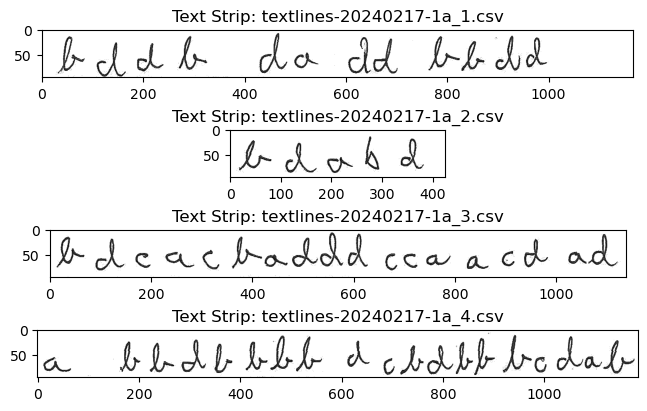

In [122]:
# Show split-up text lines individually
dirname = "/Users/jonathan/Development/Git/Data-Scientist/" + \
    "Handwriting-Analyzer/textlines-separated-20240219/"
filenames =  ["textlines-20240217-1a_1.csv", "textlines-20240217-1a_2.csv",
    "textlines-20240217-1a_3.csv", "textlines-20240217-1a_4.csv"]

textline_paths = [dirname + fname for fname in filenames]
textline_data = [pd.read_csv(textline_path) for textline_path in textline_paths]

edgesize = 100
extract_filename_re = r".+\/(.+)"

fig, ax = plt.subplots(nrows=len(textline_paths), ncols=1, figsize=(10, 4), 
                       layout='constrained')
for i in range(len(textline_paths)):
    data = textline_data[i]
    fname = re.match(extract_filename_re, textline_paths[i]).group(1)
    ax[i].title.set_text("Text Strip: " + fname)
    ax[i].imshow(data, cmap="gray")
plt.show()

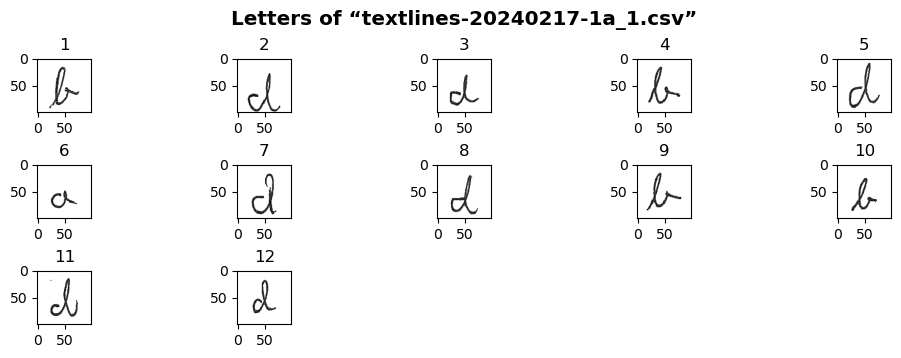

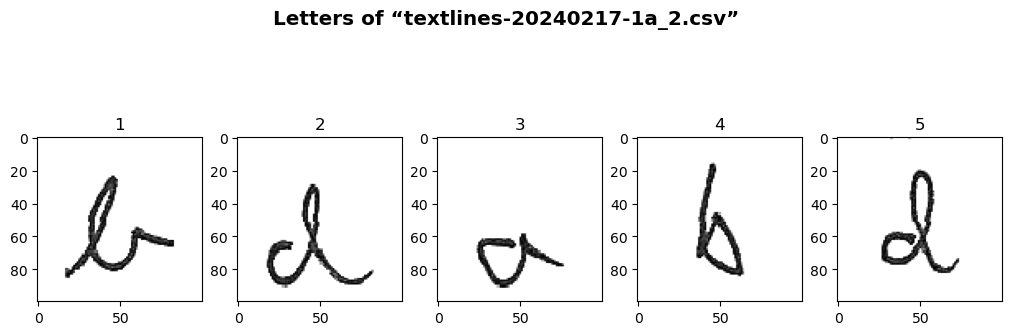

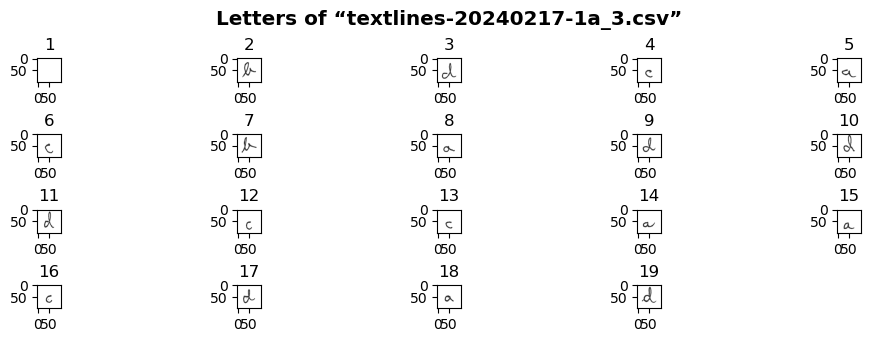

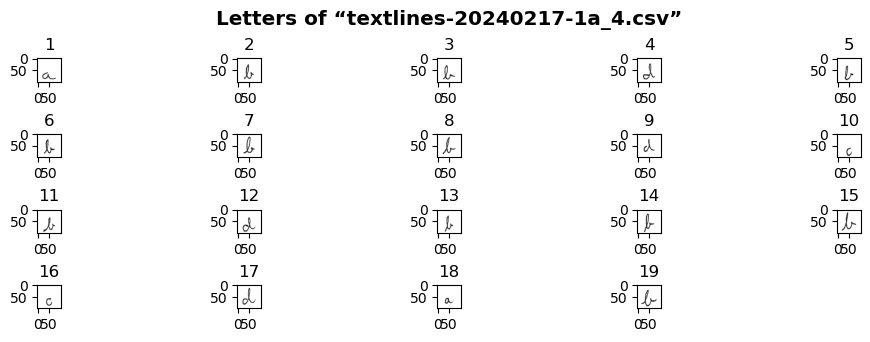

In [126]:
# Resize letters to uniform dimensions and show
for i in range(len(textline_paths)):
    '''Read image file with string of letters; return arrays of string and split letters'''
    csv_whitened_2, split_letters = clean_split_textline.main(textline_paths[i])
    letters_resized = [resize_uniform(split_letters[i]) \
        for i in range(len(split_letters))] #default edgesize: 100
    show_letters(letters_resized, "Letters of “" + filenames[i] + "”") 